In [6]:
import fix_yahoo_finance as yf  
import pandas as pd 
import numpy as np 
import networkx as nx
import scipy.special 
pd.core.common.is_list_like = pd.api.types.is_list_like 
import pandas_datareader as pdr 
from matplotlib import pyplot as plt
from datetime import date, datetime
import math
import random

# from plotly.offline import iplot
# import plotly.graph_objs as go
# yf.pdr_override() 

#### Генерация случайных последовательностей из нормального распределния с данной матрицей корреляции и нулевым вектором математетического ожидания, построение MST по новым СВ и сравнение его с истиным MST

True


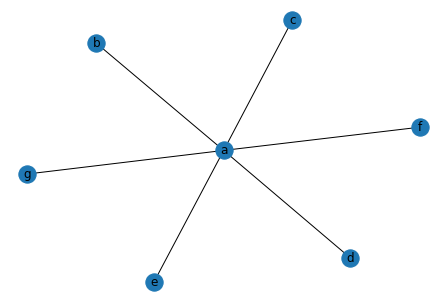

In [62]:
stcks = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
corr = [[1, 0, 0, 0, 0, 0, 0],\
        [0, 1, 0, 0, 0, 0, 0],\
        [0, 0, 1, 0, 0, 0, 0],\
        [0, 0, 0, 1, 0, 0, 0],\
        [0, 0, 0, 0, 1, 0, 0],\
        [0, 0, 0, 0, 0, 1, 0],\
        [0, 0, 0, 0, 0, 0, 1]]

ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prima_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True)


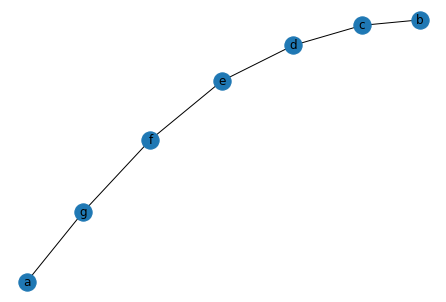

In [63]:
new_rets = get_norm_seq(corr, 100)
new_inds = get_inds_matrix(new_rets)

G = create_hypot_MST(new_inds, stcks, 0.1)
nx.draw(G, with_labels=True)

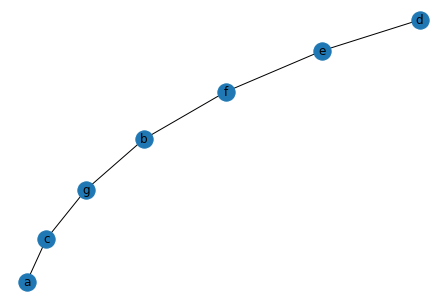

In [64]:
G = create_hypot_MST(new_inds, stcks, 0.1, kind_of_test='complex_rand')
nx.draw(G, with_labels=True)

In [0]:
def compare_procedures(ref_MST, iters=1000, alphas=[0.2, 0.15, 0.1, 0.05], seq_nums=[100]):
  for alpha in alphas:
    print('alpha = ', alpha)
    for seq_num in seq_nums:
      count_corr = 0
      count_simple = 0
      count_compl_rand = 0
      count_compl_max = 0
      for iter in range(iters):
        new_rets = get_norm_seq(corr, seq_num)
        new_inds = get_inds_matrix(new_rets)
        G_corr = create_Prima_MST(np.corrcoef(new_rets), stcks)
        G_hypoth = create_hypot_MST(new_inds, stcks, alpha)
        G_compl_rand = create_hypot_MST(new_inds, stcks, alpha, kind_of_test='complex_rand')
        G_compl_max = create_hypot_MST(new_inds, stcks, alpha, kind_of_test='complex_max')
        if sorted(ref_MST.degree) == sorted(G_corr.degree):
          count_corr += 1
        if sorted(ref_MST.degree) == sorted(G_hypoth.degree):
          count_simple += 1
        if sorted(ref_MST.degree) == sorted(G_compl_rand.degree):
          count_compl_rand += 1
        if sorted(ref_MST.degree) == sorted(G_compl_max.degree):
          count_compl_max += 1
          
      print('observations number = {} \n \
      rate of the same: \n \
      procedure of correlation: {} \n \
      simple hypothetical procedure: {} \n \
      complex (rand) hypothetical procedure: {} \n \
      complex (max) hypothetical procedure: {}'.format(seq_num, \
                                              count_corr/iters, \
                                              count_simple/iters, \
                                              count_compl_rand/iters, \
                                              count_compl_max/iters))

True


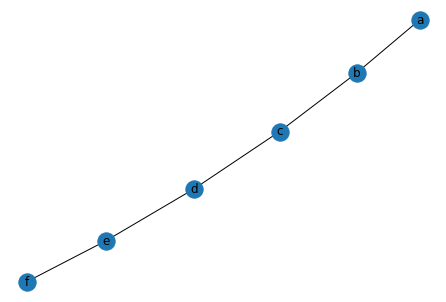

In [79]:
stcks = ['a', 'b', 'c', 'd', 'e', 'f']
corr = [[1, 0.5, 0, 0, 0, 0],\
        [0.5, 1, 0.5, 0, 0, 0],\
        [0, 0.5, 1, 0.5, 0, 0],\
        [0, 0, 0.5, 1, 0.5, 0],\
        [0, 0, 0, 0.5, 1, 0.5],\
        [0, 0, 0, 0, 0.5, 1]]

ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prima_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True)


[[ 1.          0.50309308  0.02624538  0.08503791  0.19023782  0.08211148]
 [ 0.50309308  1.          0.38872631  0.00774981  0.10412901 -0.02709614]
 [ 0.02624538  0.38872631  1.          0.53128088  0.01455224 -0.0431596 ]
 [ 0.08503791  0.00774981  0.53128088  1.          0.52045143 -0.03155902]
 [ 0.19023782  0.10412901  0.01455224  0.52045143  1.          0.55547817]
 [ 0.08211148 -0.02709614 -0.0431596  -0.03155902  0.55547817  1.        ]]


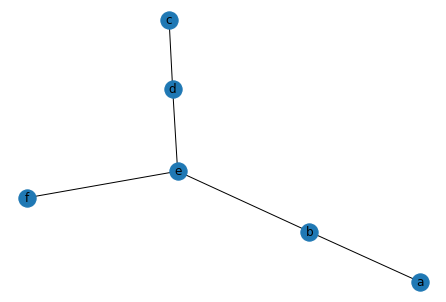

In [75]:
new_rets = get_norm_seq(corr, 100)
new_inds = get_inds_matrix(new_rets)

print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.1)
nx.draw(G, with_labels=True)

[[ 1.          0.50309308  0.02624538  0.08503791  0.19023782  0.08211148]
 [ 0.50309308  1.          0.38872631  0.00774981  0.10412901 -0.02709614]
 [ 0.02624538  0.38872631  1.          0.53128088  0.01455224 -0.0431596 ]
 [ 0.08503791  0.00774981  0.53128088  1.          0.52045143 -0.03155902]
 [ 0.19023782  0.10412901  0.01455224  0.52045143  1.          0.55547817]
 [ 0.08211148 -0.02709614 -0.0431596  -0.03155902  0.55547817  1.        ]]


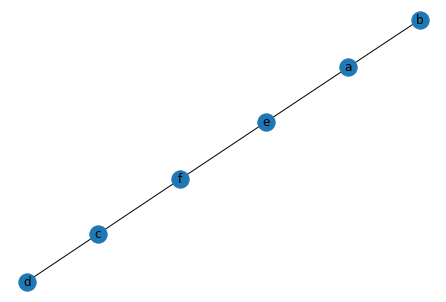

In [76]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.1, kind_of_test='complex_rand')
nx.draw(G, with_labels=True)

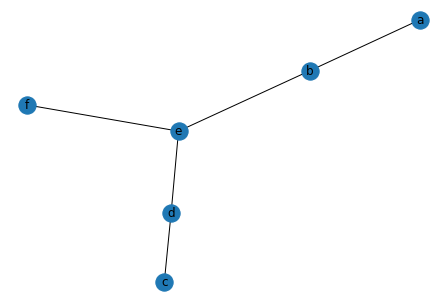

In [77]:
G = create_hypot_MST(new_inds, stcks, 0.1, kind_of_test='complex_max')
nx.draw(G, with_labels=True)

##### Compare procedures


In [80]:
compare_procedures(ref_MST1, 1000, alphas=[0.1, 0.05])

alpha =  0.1
observations number = 100 
       rate of the same: 
       procedure of correlation: 1.0 
       simple hypothetical procedure: 0.285 
       complex (rand) hypothetical procedure: 0.343 
       complex (max) hypothetical procedure: 0.226
alpha =  0.05
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.998 
       simple hypothetical procedure: 0.116 
       complex (rand) hypothetical procedure: 0.171 
       complex (max) hypothetical procedure: 0.075


##### Continue

True


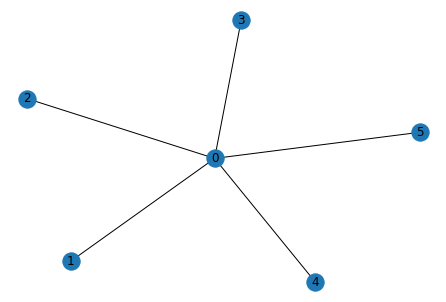

In [81]:
stcks = ['0', '1', '2', '3', '4', '5']
corr = [[1, 0.4, 0.4, 0.4, 0.4, 0.4],\
        [0.4, 1, 0, 0, 0, 0],\
        [0.4, 0, 1, 0, 0, 0],\
        [0.4, 0, 0, 1, 0, 0],\
        [0.4, 0, 0, 0, 1, 0],\
        [0.4, 0, 0, 0, 0, 1]]

ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prima_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True)


[[ 1.          0.41244269  0.36145384  0.29177373  0.41903777  0.45604584]
 [ 0.41244269  1.          0.03665534 -0.02150926 -0.06745997 -0.02678325]
 [ 0.36145384  0.03665534  1.         -0.18445846  0.05544319  0.21929171]
 [ 0.29177373 -0.02150926 -0.18445846  1.         -0.03854574 -0.1076604 ]
 [ 0.41903777 -0.06745997  0.05544319 -0.03854574  1.          0.04676406]
 [ 0.45604584 -0.02678325  0.21929171 -0.1076604   0.04676406  1.        ]]


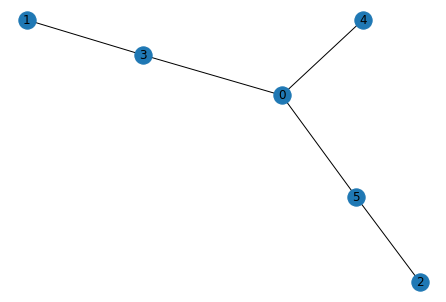

In [82]:
new_rets = get_norm_seq(corr, 100)
new_inds = get_inds_matrix(new_rets)

print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15)
nx.draw(G, with_labels=True)

[[ 1.          0.41244269  0.36145384  0.29177373  0.41903777  0.45604584]
 [ 0.41244269  1.          0.03665534 -0.02150926 -0.06745997 -0.02678325]
 [ 0.36145384  0.03665534  1.         -0.18445846  0.05544319  0.21929171]
 [ 0.29177373 -0.02150926 -0.18445846  1.         -0.03854574 -0.1076604 ]
 [ 0.41903777 -0.06745997  0.05544319 -0.03854574  1.          0.04676406]
 [ 0.45604584 -0.02678325  0.21929171 -0.1076604   0.04676406  1.        ]]


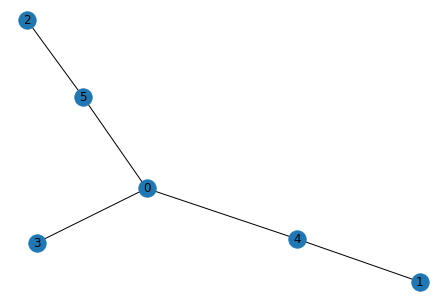

In [83]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15, kind_of_test='complex_rand')
nx.draw(G, with_labels=True)

[[ 1.          0.41244269  0.36145384  0.29177373  0.41903777  0.45604584]
 [ 0.41244269  1.          0.03665534 -0.02150926 -0.06745997 -0.02678325]
 [ 0.36145384  0.03665534  1.         -0.18445846  0.05544319  0.21929171]
 [ 0.29177373 -0.02150926 -0.18445846  1.         -0.03854574 -0.1076604 ]
 [ 0.41903777 -0.06745997  0.05544319 -0.03854574  1.          0.04676406]
 [ 0.45604584 -0.02678325  0.21929171 -0.1076604   0.04676406  1.        ]]


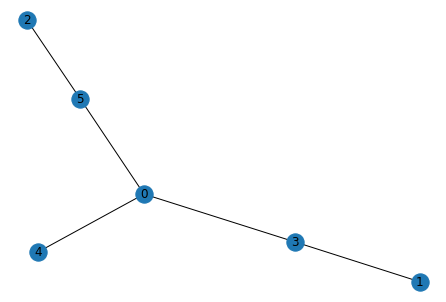

In [84]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15, kind_of_test='complex_max')
nx.draw(G, with_labels=True)


##### Compare procedures

In [85]:
compare_procedures(ref_MST1, 1000, alphas=[0.1, 0.05])

alpha =  0.1
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.998 
       simple hypothetical procedure: 0.032 
       complex (rand) hypothetical procedure: 0.098 
       complex (max) hypothetical procedure: 0.014
alpha =  0.05
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.999 
       simple hypothetical procedure: 0.003 
       complex (rand) hypothetical procedure: 0.048 
       complex (max) hypothetical procedure: 0.001


##### Continue

True


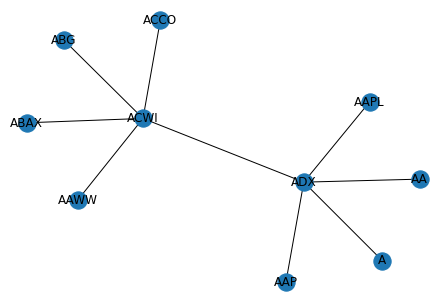

In [72]:
corr = [[1.0000, 0.7220, 0.4681, 0.4809, 0.6209, 0.5380, 0.6252, 0.6285, 0.7786, 0.7909], \
        [0.7220, 1.0000, 0.4395, 0.5979, 0.6381, 0.5725, 0.6666, 0.6266, 0.8583, 0.8640], \
        [0.4681, 0.4395, 1.0000, 0.3432, 0.3468, 0.2740, 0.4090, 0.4016, 0.4615, 0.4832], \
        [0.4809, 0.5979, 0.3432, 1.0000, 0.4518, 0.4460, 0.4635, 0.4940, 0.6447, 0.6601], \
        [0.6209, 0.6381, 0.3468, 0.4518, 1.0000, 0.5640, 0.5994, 0.5369, 0.7170, 0.7136], \
        [0.5380, 0.5725, 0.2740, 0.4460, 0.5640, 1.0000, 0.4969, 0.4775, 0.6439, 0.6242], \
        [0.6252, 0.6666, 0.4090, 0.4635, 0.5994, 0.4969, 1.0000, 0.6098, 0.7161, 0.7158], \
        [0.6285, 0.6266, 0.4016, 0.4940, 0.5369, 0.4775, 0.6098, 1.0000, 0.6805, 0.6748], \
        [0.7786, 0.8583, 0.4615, 0.6447, 0.7170, 0.6439, 0.7161, 0.6805, 1.0000, 0.9523], \
        [0.7909, 0.8640, 0.4832, 0.6601, 0.7136, 0.6242, 0.7158, 0.6748, 0.9523, 1.0000]]

stcks = ['A', 'AA', 'AAP', 'AAPL', 'AAWW', 'ABAX', 'ACCO', 'ABG', 'ACWI', 'ADX']

ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prima_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True)

In [0]:
new_rets = get_norm_seq(corr, 100)
new_inds = get_inds_matrix(new_rets)

print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15)
nx.draw(G, with_labels=True)

In [0]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15, kind_of_test='complex_rand')
nx.draw(G, with_labels=True)

In [0]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15, kind_of_test='complex_max')
nx.draw(G, with_labels=True)

###### Compare procedures

In [73]:
compare_procedures(ref_MST1, 1000, alphas=[0.1, 0.05])

alpha =  0.1
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.068 
       simple hypothetical procedure: 0.0 
       complex (rand) hypothetical procedure: 0.0 
       complex (max) hypothetical procedure: 0.0
alpha =  0.05
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.066 
       simple hypothetical procedure: 0.0 
       complex (rand) hypothetical procedure: 0.0 
       complex (max) hypothetical procedure: 0.0


##### Continue

In [19]:
X = [1, 2, 3]
Y = [5, 3, 8]

np.corrcoef(X, Y)

array([[1.        , 0.59603956],
       [0.59603956, 1.        ]])

In [22]:
np.sqrt(27)/np.sqrt(76)

0.5960395606792697